In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [2]:
####################################################################################

#Step 1 — Knowing The Dataset
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
#Meaning of code: 
#transforms.ToTensor() — converts the image into numbers and separates the image into three color channels: red, green & blue. 
#Then it converts the pixels of each image to the brightness of their color between 0 and 255. 
#These values are then scaled down to a range between 0 and 1. The image is now a Torch Tensor.

#transforms.Normalize() — normalizes the tensor with a mean and standard deviation which goes as the two parameters respectively.

In [3]:
#Step 1 — Knowing The Dataset
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)
#Meaning of code: 
#Download the data sets, shuffle them and transform each of them.
#load them to DataLoader, which combines the data-set 
#and a sampler and provides single- or multi-process iterators over the data-set.

In [6]:
#Step 2 — Knowing The Dataset Better
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape)
print(labels.shape)
#Meaning of code:
#The shape of images is torch.Size([64,1,28,28]) = there are 64 images in each batch and each image has a dimension of 28 x 28 pixels.
#the labels have a shape as torch.Size([64]). 

torch.Size([64, 1, 28, 28])
torch.Size([64])


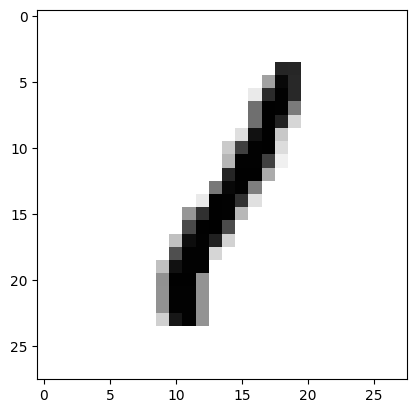

In [9]:
#displays one image from the training set
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

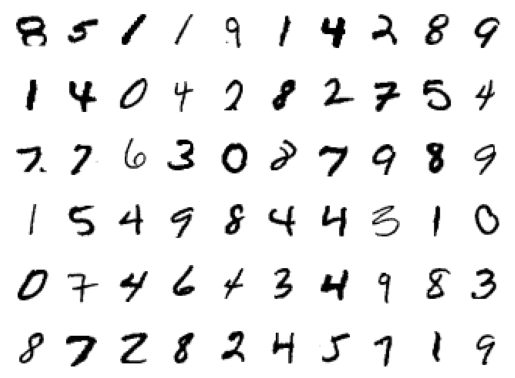

In [12]:
#display some more images, this will give us a feel of how the dataset looks like.
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [14]:
#Step 3 — Build The Neural Network
input_size = 784
hidden_sizes = [128, 64] # hidden layer 1 = 128 og hidden layer 2 = 64
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)
#Meaning of code:
#


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)
